In [4]:
%load_ext lab_black
import numpy as np
from sklearn import svm

## Analise dos Dados

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Carregar os dados de treinamento normais
n1 = np.loadtxt("n1.dat")
n2 = np.loadtxt(data_path + "n2.dat")
n4 = np.loadtxt(data_path + "n4.dat")
n5 = np.loadtxt(data_path + "n5.dat")

# Carregar os dados de treinamento epilépticos
s1 = np.loadtxt(data_path + "s1.dat")
s2 = np.loadtxt(data_path + "s2.dat")
s4 = np.loadtxt(data_path + "s4.dat")
s5 = np.loadtxt(data_path + "s5.dat")

n3 = np.loadtxt(data_path + "n3.dat")
n3 = n3[:, 1025:6145]
s3 = np.loadtxt(data_path + "s3.dat")
s3 = s3[:, 1025:6145]


# Definir os parâmetros
sampling_rate = 256
n_channels = 24

# Calcular o PSD para os dados normais
frequencies_n, psd_n = signal.welch(np.concatenate((n1, n2, n3, n4, n5)), fs=sampling_rate, nperseg=256)

# Calcular o PSD para os dados epilépticos
frequencies_s, psd_s = signal.welch(np.concatenate((s1, s2, s3, s4, s5)), fs=sampling_rate, nperseg=256)

# Plotar o PSD
plt.figure(figsize=(20, 20))
for channel in range(n_channels):
    plt.subplot(6, 4, channel+1)
    plt.plot(frequencies_n, psd_n[channel], label='Normal')
    plt.title('Channel {}'.format(channel+1))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density')
    plt.xlim(0, 20)
    plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'data_path' is not defined

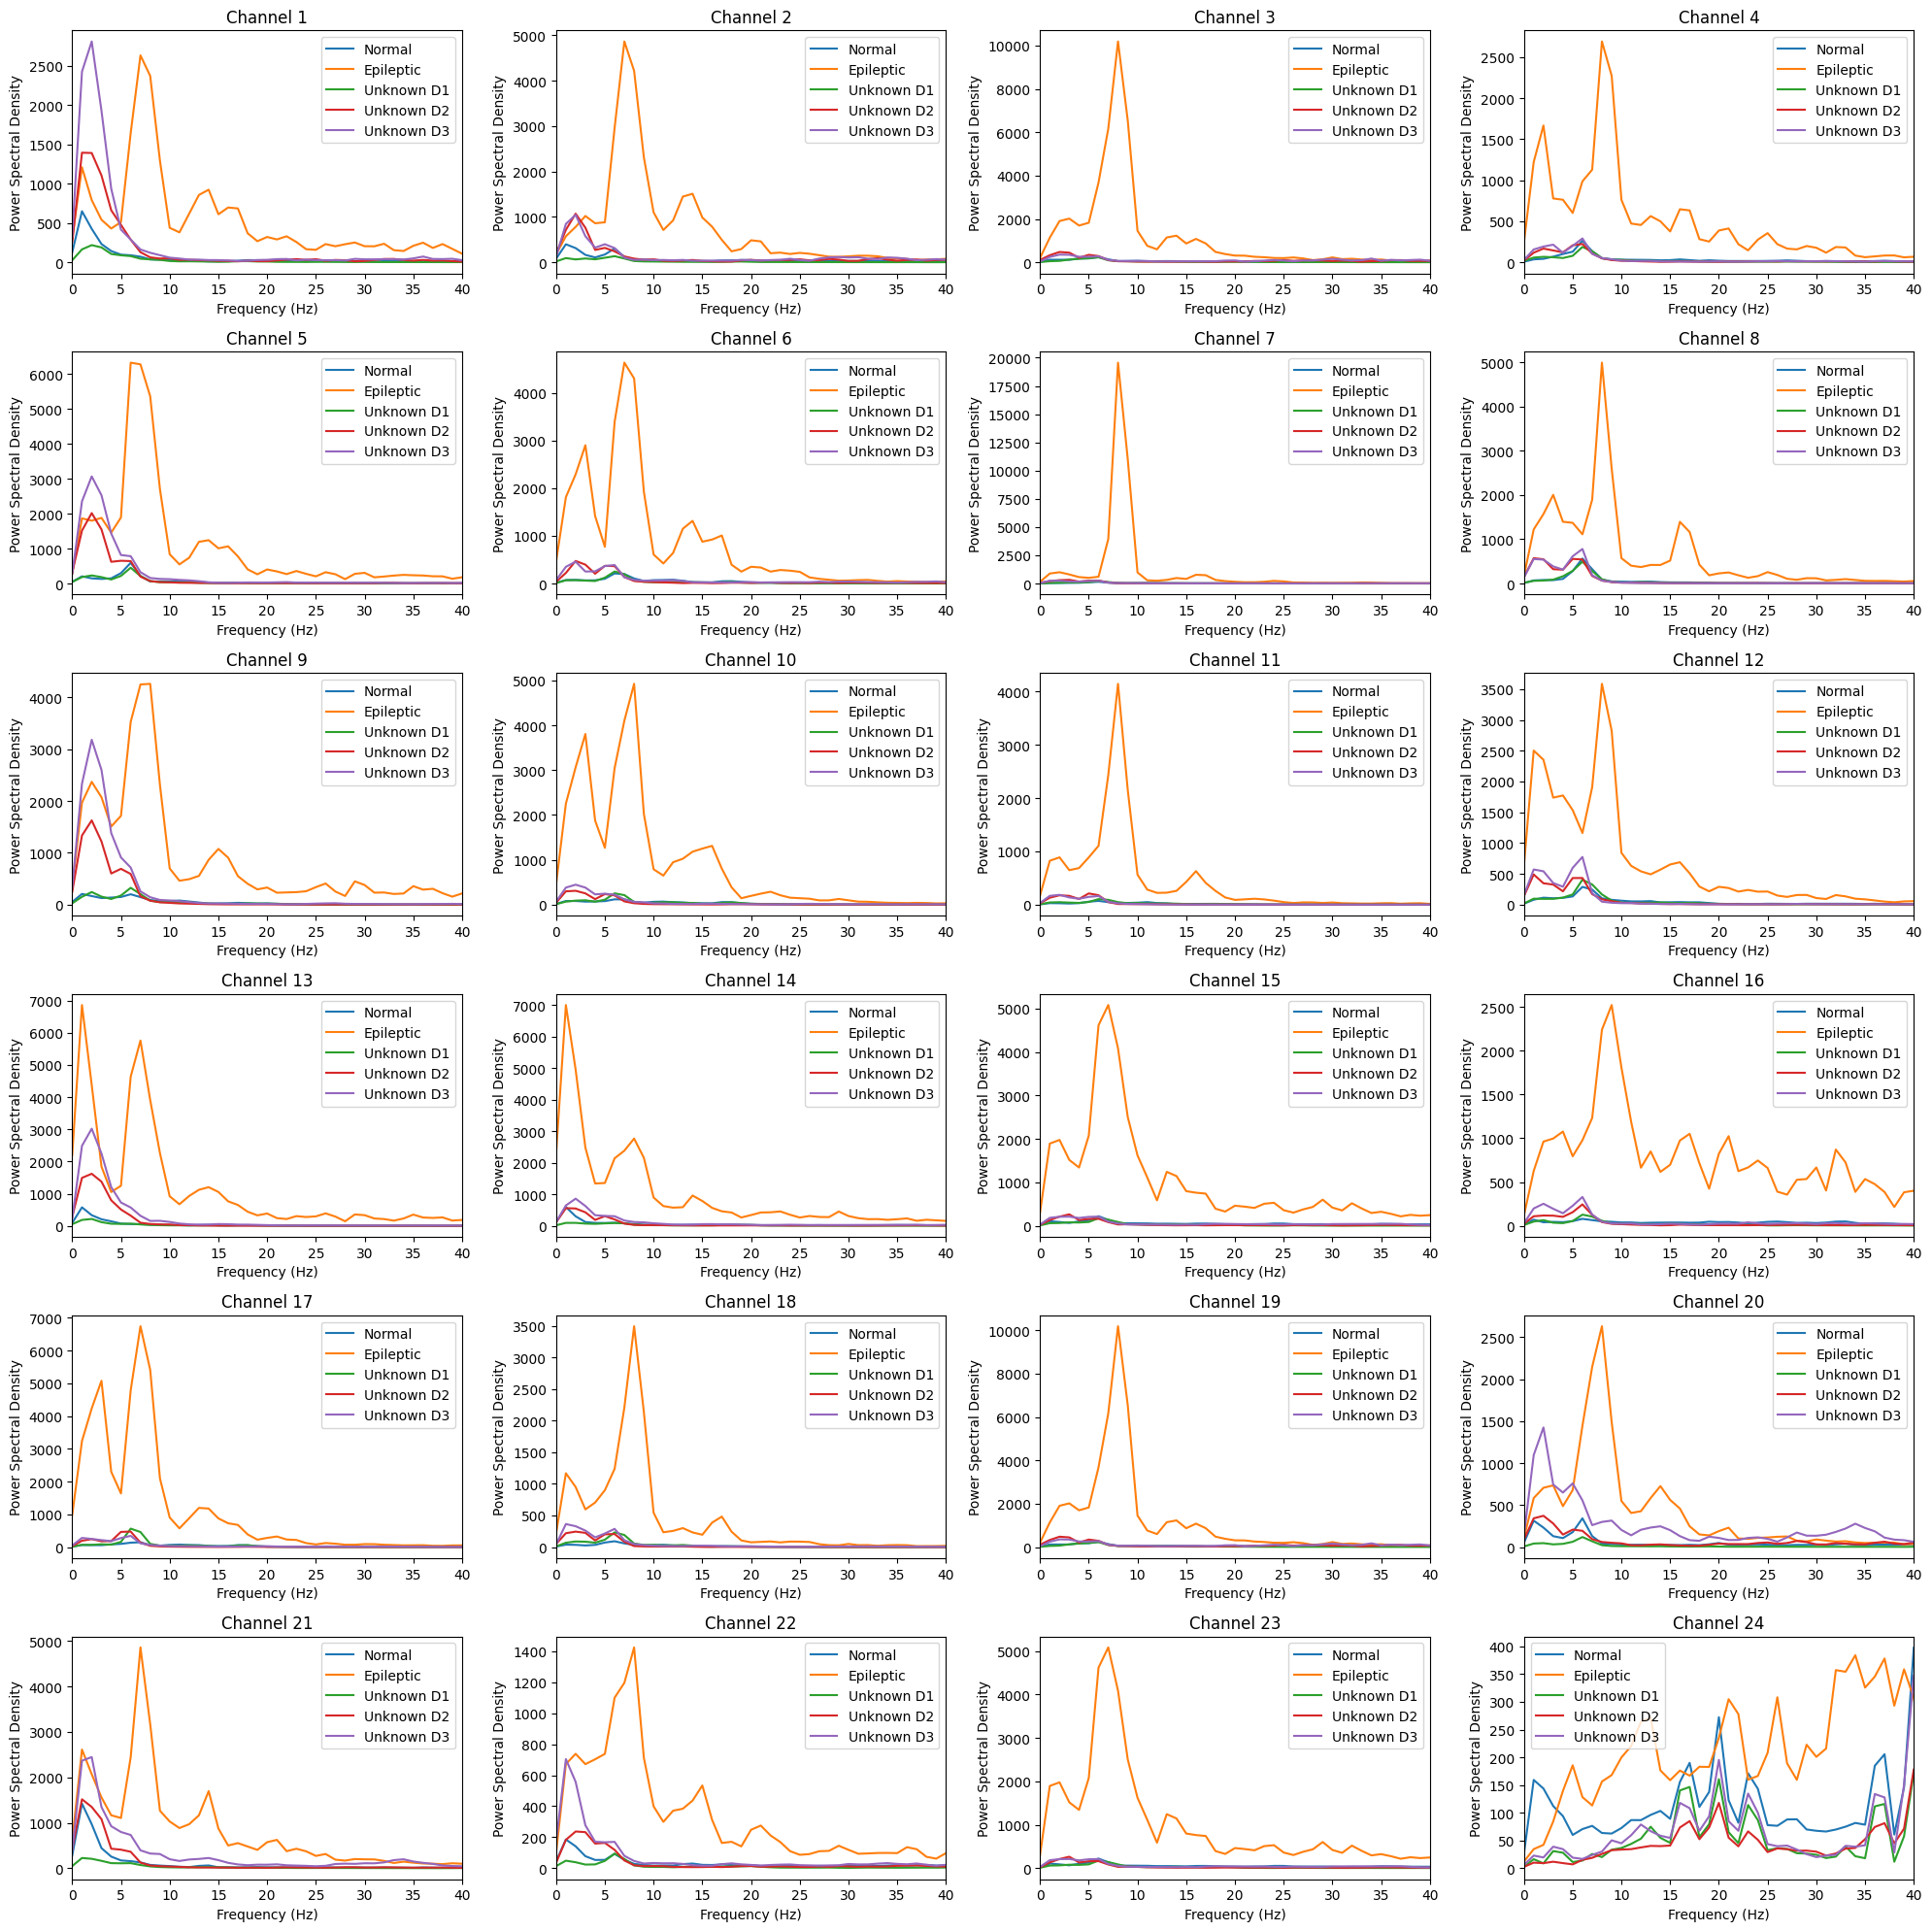

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Carregar os dados de treinamento normais
n1 = np.loadtxt(data_path + "n1.dat")
n2 = np.loadtxt(data_path + "n2.dat")
n4 = np.loadtxt(data_path + "n4.dat")
n5 = np.loadtxt(data_path + "n5.dat")

# Carregar os dados de treinamento epilépticos
s1 = np.loadtxt(data_path + "s1.dat")
s2 = np.loadtxt(data_path + "s2.dat")
s4 = np.loadtxt(data_path + "s4.dat")
s5 = np.loadtxt(data_path + "s5.dat")

# Carregar os dados desconhecidos
d1 = np.loadtxt(data_path + "d1.dat")
d2 = np.loadtxt(data_path + "d2.dat")
d3 = np.loadtxt(data_path + "d3.dat")

n3 = np.loadtxt(data_path + "n3.dat")
n3 = n3[:, 1025:6145]
s3 = np.loadtxt(data_path + "s3.dat")
s3 = s3[:, 1025:6145]


# Definir os parâmetros
sampling_rate = 256
n_channels = 24

# Calcular o PSD para os dados normais
frequencies_n, psd_n = signal.welch(np.concatenate((n1, n2, n3, n4, n5)), fs=sampling_rate, nperseg=256)

# Calcular o PSD para os dados epilépticos
frequencies_s, psd_s = signal.welch(np.concatenate((s1, s2, s3, s4, s5)), fs=sampling_rate, nperseg=256)

# Calcular o PSD para os dados desconhecidos
frequencies_d1, psd_d1 = signal.welch(d1, fs=sampling_rate, nperseg=256)
frequencies_d2, psd_d2 = signal.welch(d2, fs=sampling_rate, nperseg=256)
frequencies_d3, psd_d3 = signal.welch(d3, fs=sampling_rate, nperseg=256)

# Plotar o PSD
plt.figure(figsize=(20, 20))
for channel in range(n_channels):
    plt.subplot(6, 4, channel+1)
    plt.plot(frequencies_n, psd_n[channel], label='Normal')
    plt.plot(frequencies_s, psd_s[channel], label='Epileptic')
    plt.plot(frequencies_d1, psd_d1[channel], label='Unknown D1')
    plt.plot(frequencies_d2, psd_d2[channel], label='Unknown D2')
    plt.plot(frequencies_d3, psd_d3[channel], label='Unknown D3')
    plt.title('Channel {}'.format(channel+1))
    plt.xlim(0, 40)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density')
    plt.legend()
plt.tight_layout()
plt.savefig("fig_com_desc_label.png")
plt.show()


## SVM

In [ ]:
import numpy as np
from sklearn import svm
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregar os dados de treinamento normais
n1 = np.loadtxt(data_path + "n1.dat")
n2 = np.loadtxt(data_path + "n2.dat")
# n3 = np.loadtxt("n3_padded.dat")
n4 = np.loadtxt(data_path + "n4.dat")
n5 = np.loadtxt(data_path + "n5.dat")

# Carregar os dados de treinamento epilépticos
s1 = np.loadtxt(data_path + "s1.dat")
s2 = np.loadtxt(data_path + "s2.dat")
# s3 = np.loadtxt("s3_padded.dat")
s4 = np.loadtxt(data_path + "s4.dat")
s5 = np.loadtxt(data_path + "s5.dat")

n3 = np.loadtxt(data_path + "n3.dat")
n3 = n3[:, 1025:6145]
s3 = np.loadtxt(data_path + "s3.dat")
s3 = s3[:, 1025:6145]

# Criar os rótulos para os dados de treinamento
y_normal = np.zeros(len(n1) + len(n2) + len(n3) + len(n4) + len(n5))
y_epileptic = np.ones(len(s1) + len(s2) + len(s3) + len(s4) + len(s5))

# Concatenar os dados de treinamento
X_train = np.concatenate((n1, n2, n3, n4, n5, s1, s2, s3, s4, s5))
y_train = np.concatenate((y_normal, y_epileptic))

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Criar o classificador SVM
clf = svm.SVC()

# Treinar o classificador SVM
clf.fit(X_train, y_train)

# Carregar os dados desconhecidos
d1 = np.loadtxt(data_path + "d1.dat")
d2 = np.loadtxt(data_path + "d2.dat")
d3 = np.loadtxt(data_path + "d3.dat")

# Realizar a classificação dos dados desconhecidos
pred1 = clf.predict(d1)
pred2 = clf.predict(d2)
pred3 = clf.predict(d3)

# Imprimir as previsões
list_pred1_svm = []
for value in pred1:
    if value == 0:
        list_pred1_svm.append("normal")
    else:
        list_pred1_svm.append("epileptico")
list_pred2_svm = []
for value in pred2:
    if value == 0:
        list_pred2_svm.append("normal")
    else:
        list_pred2_svm.append("epileptico")
list_pred3_svm = []
for value in pred3:
    if value == 0:
        list_pred3_svm.append("normal")
    else:
        list_pred3_svm.append("epileptico")

# Converter as previsões em valores numéricos (0 para normal e 1 para epiléptico)
list_pred1_svm = pred1.tolist()
list_pred2_svm = pred2.tolist()
list_pred3_svm = pred3.tolist()

# Criar DataFrame para comparar as previsões
df = pd.DataFrame({
    'Prediction_D1': list_pred1_svm,
    'Prediction_D2': list_pred2_svm,
    'Prediction_D3': list_pred3_svm
})

# Mapear os valores numéricos de volta para as strings 'normal' e 'epiléptico'
df.replace({0: 'normal', 1: 'epiléptico'}, inplace=True)

# Avaliar o desempenho do modelo nos dados de teste
accuracy = clf.score(X_test, y_test)
print("Acurácia no conjunto de teste:", accuracy)

# Exibir DataFrame
df


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Acurácia no conjunto de teste: 0.7708333333333334


,Prediction_D1,Prediction_D2,Prediction_D3
0,normal,normal,normal
1,normal,normal,normal
2,normal,normal,normal
3,normal,normal,normal
4,normal,normal,epiléptico
5,normal,normal,normal
6,normal,normal,normal
7,normal,normal,normal
8,normal,normal,epiléptico
9,normal,normal,normal


## Rede Neural

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Carregar os dados de treinamento normais
n1 = np.loadtxt(data_path + "n1.dat")
n2 = np.loadtxt(data_path + "n2.dat")
n3 = np.loadtxt(data_path + "n3.dat")
n4 = np.loadtxt(data_path + "n4.dat")
n5 = np.loadtxt(data_path + "n5.dat")

# Carregar os dados de treinamento epilépticos
s1 = np.loadtxt(data_path + "s1.dat")
s2 = np.loadtxt(data_path + "s2.dat")
s3 = np.loadtxt(data_path + "s3.dat")
s4 = np.loadtxt(data_path + "s4.dat")
s5 = np.loadtxt(data_path + "s5.dat")

n3 = np.loadtxt(data_path + "n3.dat")
n3 = n3[:, 1025:6145]
s3 = np.loadtxt(data_path + "s3.dat")
s3 = s3[:, 1025:6145]

# Criar os rótulos para os dados de treinamento
y_normal = np.zeros(len(n1) + len(n2) + len(n3) + len(n4) + len(n5))
y_epileptic = np.ones(len(s1) + len(s2) + len(s3) + len(s4) + len(s5))

# Concatenar os dados de treinamento
X_train = np.concatenate((n1, n2, n3, n4, n5, s1, s2, s3, s4, s5))
y_train = np.concatenate((y_normal, y_epileptic))

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Pré-processamento dos dados
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar a rede neural
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinar a rede neural
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Carregar os dados desconhecidos
d1 = np.loadtxt(data_path + "d1.dat")
d2 = np.loadtxt(data_path + "d2.dat")
d3 = np.loadtxt(data_path + "d3.dat")

# Pré-processamento dos dados desconhecidos
d1 = scaler.transform(d1)
d2 = scaler.transform(d2)
d3 = scaler.transform(d3)


# Realizar a classificação dos dados desconhecidos
threshold = 0.9
prob1 = model.predict(d1).flatten()
prob2 = model.predict(d2).flatten()
prob3 = model.predict(d3).flatten()
pred1 = (prob1 > threshold).astype(int)
pred2 = (prob2 > threshold).astype(int)
pred3 = (prob3 > threshold).astype(int)

print(pred1)

# Imprimir as previsões
list_pred1_svm = []
for value in pred1:
    if value == 0:
        list_pred1_svm.append("normal")
    else:
        list_pred1_svm.append("epileptico")
list_pred2_svm = []
for value in pred2:
    if value == 0:
        list_pred2_svm.append("normal")
    else:
        list_pred2_svm.append("epileptico")
list_pred3_svm = []
for value in pred3:
    if value == 0:
        list_pred3_svm.append("normal")
    else:
        list_pred3_svm.append("epileptico")

# Converter as previsões em valores numéricos (0 para normal e 1 para epiléptico)
list_pred1_svm = pred1.tolist()
list_pred2_svm = pred2.tolist()
list_pred3_svm = pred3.tolist()

# Criar DataFrame para comparar as previsões
df = pd.DataFrame({
    'Prediction_D1': list_pred1_svm,
    'Prediction_D2': list_pred2_svm,
    'Prediction_D3': list_pred3_svm
})

# Mapear os valores numéricos de volta para as strings 'normal' e 'epiléptico'
df.replace({0: 'normal', 1: 'epiléptico'}, inplace=True)

# Exibir DataFrame
df

Epoch 1/100
6/6 [==============================] - 0s 8ms/step - loss: 0.8404 - accuracy: 0.7031
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.1615 - accuracy: 0.9844
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 0.7145 - accuracy: 0.9792
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0147 - accuracy: 0.9948
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 1.0000
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 8/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 10/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 11/100
6/6 [===========

,Prediction_D1,Prediction_D2,Prediction_D3
0,normal,normal,epiléptico
1,normal,epiléptico,normal
2,normal,normal,normal
3,normal,epiléptico,normal
4,normal,normal,epiléptico
5,normal,normal,normal
6,normal,normal,normal
7,normal,epiléptico,epiléptico
8,normal,normal,epiléptico
9,normal,epiléptico,normal


## Fixed


In [ ]:
import numpy as np

# Função para calcular a distância euclidiana entre dois vetores
def calcular_distancia(vetor1, vetor2):
    return np.linalg.norm(vetor1 - vetor2)

# Função para calcular o centroide dos dados normais
def calcular_centroide(dados_normais):
    return np.mean(dados_normais, axis=0)

# Função para classificar um conjunto de dados
def classificar_dados(dados_normais, dados_epilepticos, dados_classificar):
    centroide_normal = calcular_centroide(dados_normais)

    centroide_epileptico = calcular_centroide(dados_epilepticos)

    for dado in dados_classificar:
        distancia_normal = calcular_distancia(dado, centroide_normal)
        distancia_epileptico = calcular_distancia(dado, centroide_epileptico)


        if distancia_normal < distancia_epileptico:
            print("Dado classificado como normal")
        else:
            print("Dado classificado como epileptico")

# Carregar os dados de treinamento normais
n1 = np.loadtxt(data_path + "n1.dat")
n2 = np.loadtxt(data_path + "n2.dat")
n3 = np.loadtxt(data_path + "n3.dat")
n4 = np.loadtxt(data_path + "n4.dat")
n5 = np.loadtxt(data_path + "n5.dat")

# Carregar os dados de treinamento epilepticos
s1 = np.loadtxt(data_path + "s1.dat")
s2 = np.loadtxt(data_path + "s2.dat")
s3 = np.loadtxt(data_path + "s3.dat")
s4 = np.loadtxt(data_path + "s4.dat")
s5 = np.loadtxt(data_path + "s5.dat")

n3 = np.loadtxt(data_path + "n3.dat")
n3 = n3[:, 1025:6145]
s3 = np.loadtxt(data_path + "s3.dat")
s3 = s3[:, 1025:6145]

# Carregar dados a serem classificados
d1 = np.loadtxt(data_path + "d1.dat")
d2 = np.loadtxt(data_path + "d2.dat")
d3 = np.loadtxt(data_path + "d3.dat")

# Agrupar os dados normais e epilepticos
dados_normais = np.concatenate((n1, n2, n3, n4, n5), axis=0)
dados_epilepticos = np.concatenate((s1, s2, s3, s4, s5), axis=0)

# Classificar os conjuntos d1, d2 e d3
classificar_dados(dados_normais, dados_epilepticos, [d1, d2, d3])

Dado classificado como normal
Dado classificado como normal
Dado classificado como normal


## Autocorrelação

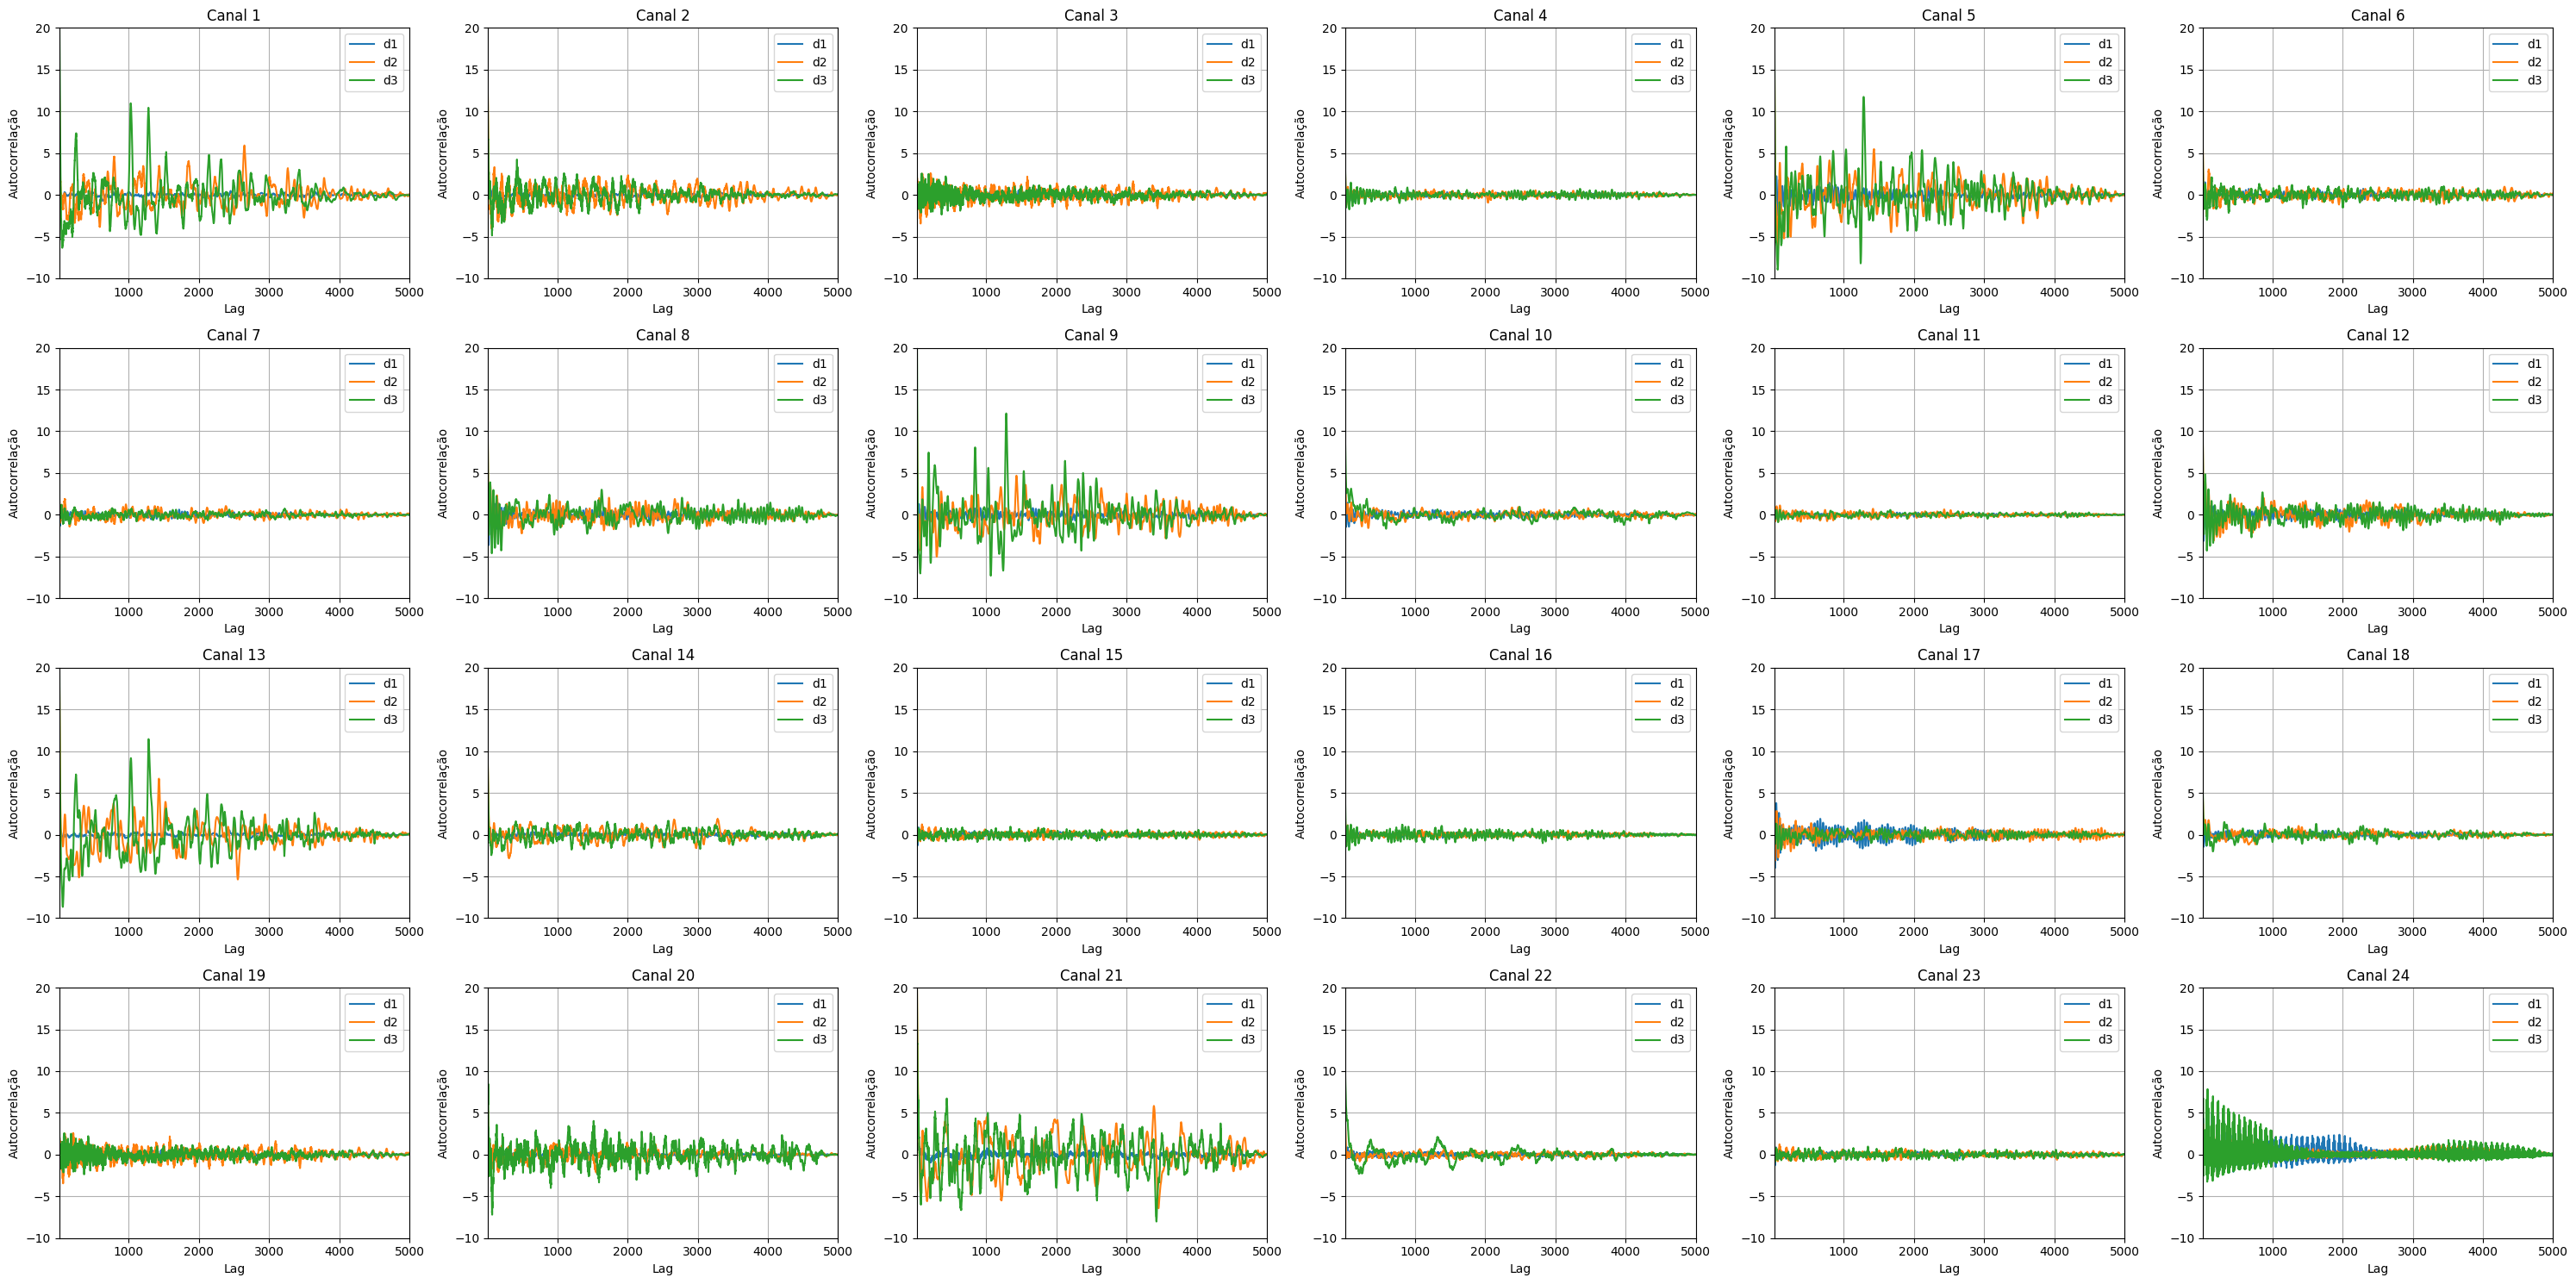

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados
d1 = np.loadtxt(data_path + 'd1.dat')
d2 = np.loadtxt(data_path + 'd2.dat')
d3 = np.loadtxt(data_path + 'd3.dat')

# Taxa de amostragem (Hz)
fs = 256

# Calcular a função de autocorrelação para cada canal
autocorr_d1 = np.zeros((24, 5120))
autocorr_d2 = np.zeros((24, 5120))
autocorr_d3 = np.zeros((24, 5120))

for i in range(24):
    autocorr_d1[i] = np.correlate(d1[i], d1[i], mode='full')[-5120:] / (5120 * fs)
    autocorr_d2[i] = np.correlate(d2[i], d2[i], mode='full')[-5120:] / (5120 * fs)
    autocorr_d3[i] = np.correlate(d3[i], d3[i], mode='full')[-5120:] / (5120 * fs)

# Configurar a figura e os subplots
fig, axs = plt.subplots(4, 6, figsize=(30, 15))

# Plotar a função de autocorrelação para cada canal
canal = 0
for i in range(4):
    for j in range(6):
        axs[i, j].plot(autocorr_d1[canal], label='d1')
        axs[i, j].plot(autocorr_d2[canal], label='d2')
        axs[i, j].plot(autocorr_d3[canal], label='d3')
        axs[i, j].set_xlim(10, 5000)
        axs[i, j].set_ylim(-10, 20)
        axs[i, j].set_title(f'Canal {canal+1}')
        axs[i, j].set_xlabel('Lag')
        axs[i, j].set_ylabel('Autocorrelação')
        axs[i, j].grid(True)
        axs[i, j].legend()
        canal += 1

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()


## Sinal Aleatorio

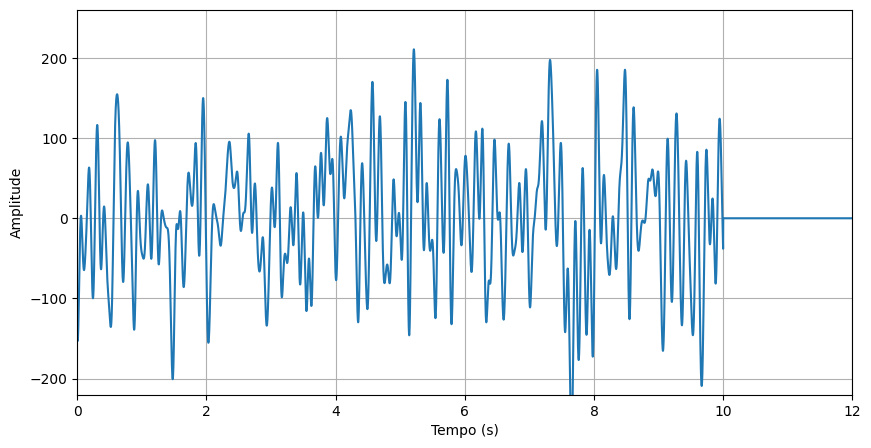

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parâmetros do sinal EEG
fs = 1000  # Taxa de amostragem (Hz)
dur = 12  # Duração do sinal (segundos)

# Número de pontos do sinal
n_points = int(fs * dur)

# Geração do sinal branco
white_noise = np.random.normal(0, 1, n_points)

# Definição do filtro passa-baixa
order = 4  # Ordem do filtro
cutoff_freq = 10  # Frequência de corte (Hz)
b, a = signal.butter(order, cutoff_freq / (fs / 2), 'low')

# Filtragem do sinal branco
filtered_noise = signal.filtfilt(b, a, white_noise)*600

# Criação do vetor de tempo
time = np.linspace(0, dur, n_points)

# Encontrar o índice correspondente a 10 segundos
index_10s = int(fs * 10)

# Zerar os valores do sinal após 10 segundos
filtered_noise[index_10s:] = 0

# Plot do PSD do sinal EEG
freq, psd = signal.welch(filtered_noise, fs, nperseg=1024)
plt.figure(figsize=(10, 5))
plt.plot(time, filtered_noise)
#plt.plot(freq, psd)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 12)
plt.ylim(-220, 260)
plt.grid(True)
plt.show()